# Assignment 1

First we need to import a few modules, execute the cell below:

In [38]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [39]:
def f(x):
    return numpy.cos(x);
    


You can use the following cell to check that your code works for scalar arguments:

In [40]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [41]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [42]:
def df_analytic(x):
    return -numpy.sin(x);

In [43]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [44]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [45]:
def backward_difference(f, x, dx):
    return (f(x)-f(x-dx))/dx;

In [46]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


Text(0.5,1,'Difference between value of the analytical derivative and the numerical derivative when dx is varied')

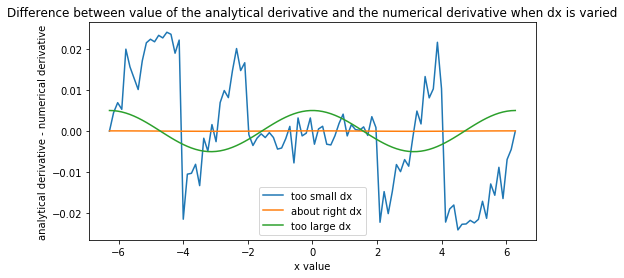

In [47]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-14)
df_dx_2 = backward_difference(f, xs, dx=1e-4)
df_dx_3 = backward_difference(f, xs, dx=1e-2)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical, label='too small dx')
plt.plot(xs, df_dx_2 - df_dx_analytical, label='about right dx')
plt.plot(xs, df_dx_3-df_dx_analytical, label='too large dx')
plt.xlabel('x value')
plt.ylabel('analytical derivative - numerical derivative')
plt.legend()
plt.title('Difference between value of the analytical derivative and the numerical derivative when dx is varied')

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When dx is too small the computer cannot store all the numbers accurately as it rounds it to a certain number of digits as it can only store a certain number of significant figures. It then this number in further calculations instead of the original number causing deviations from the true value. 
If dx is too large then the chord drawn on the curve between x and x+dx is not as good an approximation of the true tangent as when dx is smaller. As a result the derivative will not be representative of the gradient of the function.